# 미니프로젝트

In [1]:
import requests
from tqdm import tqdm
import pandas as pd
import numpy as np
import time
import my_utils_PJ as mu
import math
import random
import imp
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
imp.reload(mu)
tqdm.pandas()

C:\Users\user\AppData\Local\Temp\ipykernel_9356\3262907889.py:9: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  import imp


In [2]:
# 폰트 조정
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/gulim.ttc"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font) # 윈도우

# 확률 구하기

In [229]:
sql_conn = mu.connect_mysql('icia')
df = pd.DataFrame(mu.mysql_execute_dict('select * from lol_mini', sql_conn))
sql_conn.close()

In [230]:
winrate= df[['gameId','teamId','win','firstChampion','firstDragon','firstTower']]

In [8]:
# 퍼블 퍼드 포블일 경우 승률
fb_fd_ft=winrate[(winrate['firstChampion']=='True')&(winrate['firstDragon']=='True')&(winrate['firstTower']=='True')]
len(fb_fd_ft)
round(len(fb_fd_ft[fb_fd_ft['win']=='True'])/len(fb_fd_ft)*100,2)

84.88

In [9]:
# 퍼블 퍼드일 경우 승률
fb_fd=winrate[(winrate['firstChampion']=='True')&(winrate['firstDragon']=='True')]
len(fb_fd)
round(len(fb_fd[fb_fd['win']=='True'])/len(fb_fd)*100,2)

73.14

In [10]:
# 퍼블 포블일 경우 승률
fb_ft=winrate[(winrate['firstChampion']=='True')&(winrate['firstTower']=='True')]
len(fb_ft)
round(len(fb_ft[fb_ft['win']=='True'])/len(fb_ft)*100,2)

76.21

In [11]:
# 퍼드 포블일 경우 승률
fd_ft=winrate[(winrate['firstDragon']=='True')&(winrate['firstTower']=='True')]
len(fd_ft)
round(len(fd_ft[fd_ft['win']=='True'])/len(fd_ft)*100,2)

82.4

In [12]:
# 퍼블 승률
fb=winrate[winrate['firstChampion']=='True']
round(len(fb[fb['win']=='True'])/len(fb)*100,2)

59.95

In [37]:
# 퍼드 승률
fd=winrate[winrate['firstDragon']=='True']
round(len(fd[fd['win']=='True'])/len(fd)*100,2)

68.7

In [14]:
# 포블 승률
ft=winrate[winrate['firstTower']=='True']
round(len(ft[ft['win']=='True'])/len(ft)*100,2)

72.8

In [207]:
# win 퍼블 퍼드 포블 bool값을 int로 변경
winrate2 = winrate.copy()
winrate2['win']=winrate2['win'].apply(lambda x:1 if x=='True' else 0)
winrate2['firstChampion']=winrate2['firstChampion'].apply(lambda x:1 if x=='True' else 0)
winrate2['firstDragon']=winrate2['firstDragon'].apply(lambda x:1 if x=='True' else 0)
winrate2['firstTower']=winrate2['firstTower'].apply(lambda x:1 if x=='True' else 0)

In [231]:
win_cnt=winrate[winrate['win']=='True']
fc_cnt=win_cnt.groupby(['firstChampion'])[['win']].count()
fc_cnt['rate']=round(fc_cnt.win/fc_cnt.sum().win*100,2)
fc_cnt

,win,rate
firstChampion,,
False,5315,39.77
True,8050,60.23


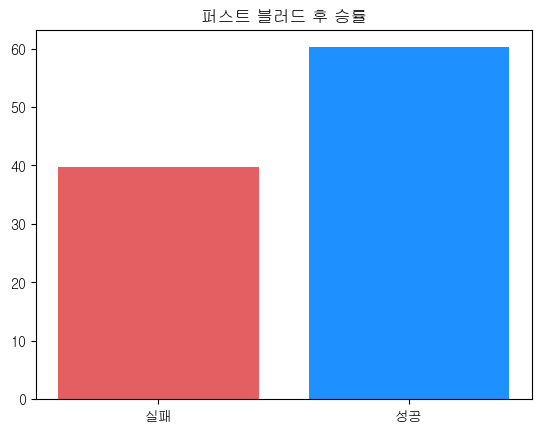

In [232]:
fc_rate=[]
for i in range(len(fc_cnt)):
    fc_rate.append(fc_cnt.iloc[i]['rate'])
fc_win=[]
for i in range(len(fc_cnt)):
    if fc_cnt.index[i]=='True':
        fc_win.append('성공')
    else:
        fc_win.append('실패')

plt.figure()
x = np.arange(2)
plt.title('퍼스트 블러드 후 승률')
plt.bar(x, fc_rate, color=['#e35f62','dodgerblue'])
plt.xticks(x, fc_win)
plt.show()

In [233]:
win_cnt=winrate[winrate['win']=='True']
fd_cnt=win_cnt.groupby(['firstDragon'])[['win']].count()
fd_cnt['rate']=round(fd_cnt.win/fd_cnt.sum().win*100,2)
fd_cnt

,win,rate
firstDragon,,
False,4625,34.61
True,8740,65.39


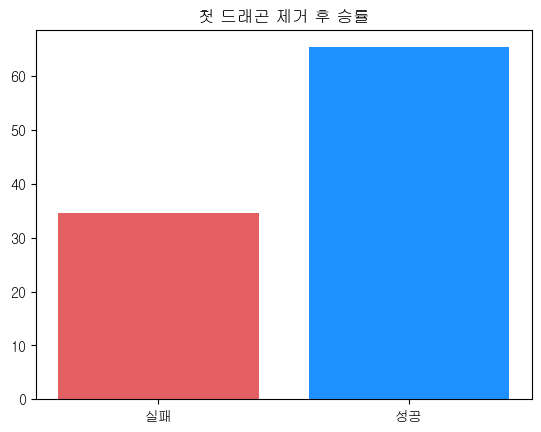

In [234]:
fd_rate=[]
for i in range(len(fd_cnt)):
    fd_rate.append(fd_cnt.iloc[i]['rate'])
fd_win=[]
for i in range(len(fd_cnt)):
    if fd_cnt.index[i]=='True':
        fd_win.append('성공')
    else:
        fd_win.append('실패')

plt.figure()
x = np.arange(2)
plt.title('첫 드래곤 제거 후 승률')
plt.bar(x, fd_rate, color=['#e35f62','dodgerblue'])
plt.xticks(x, fd_win)
plt.show()

In [235]:
win_cnt=winrate[winrate['win']=='True']
ft_cnt=win_cnt.groupby(['firstTower'])[['win']].count()
ft_cnt['rate']=round(ft_cnt.win/ft_cnt.sum().win*100,2)
ft_cnt

,win,rate
firstTower,,
False,3430,25.66
True,9935,74.34


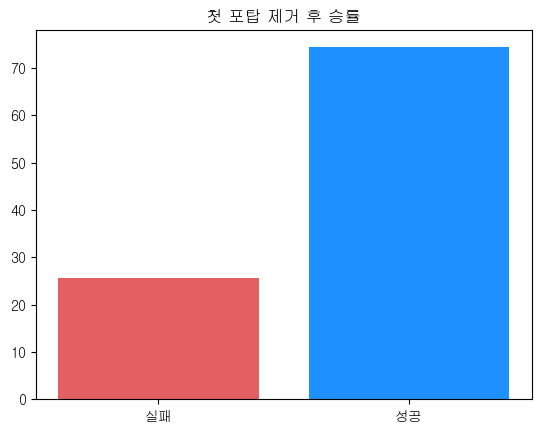

In [236]:
ft_rate=[]
for i in range(len(ft_cnt)):
    ft_rate.append(ft_cnt.iloc[i]['rate'])
ft_win=[]
for i in range(len(ft_cnt)):
    if ft_cnt.index[i]=='True':
        ft_win.append('성공')
    else:
        ft_win.append('실패')

plt.figure()
x = np.arange(2)
plt.title('첫 포탑 제거 후 승률')
plt.bar(x, ft_rate, color=['#e35f62','dodgerblue'])
plt.xticks(x, ft_win)
plt.show()

In [237]:
tot_cnt = win_cnt.groupby(['firstChampion','firstDragon','firstTower'])[['win']].count()
tot_cnt['rate']=round(tot_cnt.win/tot_cnt.sum().win*100,2)
tot_cnt

win   rate
firstChampion firstDragon firstTower             
False         False       False        780   5.84
                          True        1280   9.58
              True        False        990   7.41
                          True        2265  16.95
True          False       False        680   5.09
                          True        1885  14.10
              True        False        980   7.33
                          True        4505  33.71

In [238]:
tot_cnt2 = tot_cnt.sort_values(by=['rate'], ascending=False)

In [239]:
rate_lst=[]
for i in range(len(tot_cnt2)):
    rate_lst.append(tot_cnt2.iloc[i]['rate'])
rate_lst

[33.71, 16.95, 14.1, 9.58, 7.41, 7.33, 5.84, 5.09]

In [240]:
lst=[]
for i in range(len(tot_cnt2)):
    if tot_cnt2.index[i]==('False', 'False', 'False') :
        lst.append('없음')
    elif tot_cnt2.index[i]==('False', 'False', 'True') :
        lst.append('포탑')
    elif tot_cnt2.index[i]==('False', 'True', 'False') :
        lst.append('용')
    elif tot_cnt2.index[i]==('False', 'True', 'True') :
        lst.append('용&포탑')
    elif tot_cnt2.index[i]==('True', 'False', 'False') :
        lst.append('퍼블')
    elif tot_cnt2.index[i]==('True', 'False', 'True') :
        lst.append('퍼블&포탑')
    elif tot_cnt2.index[i]==('True', 'True', 'False') :
        lst.append('퍼블&용')
    else :
        lst.append('퍼블&용&포탑')
lst

['퍼블&용&포탑', '용&포탑', '퍼블&포탑', '포탑', '용', '퍼블&용', '없음', '퍼블']

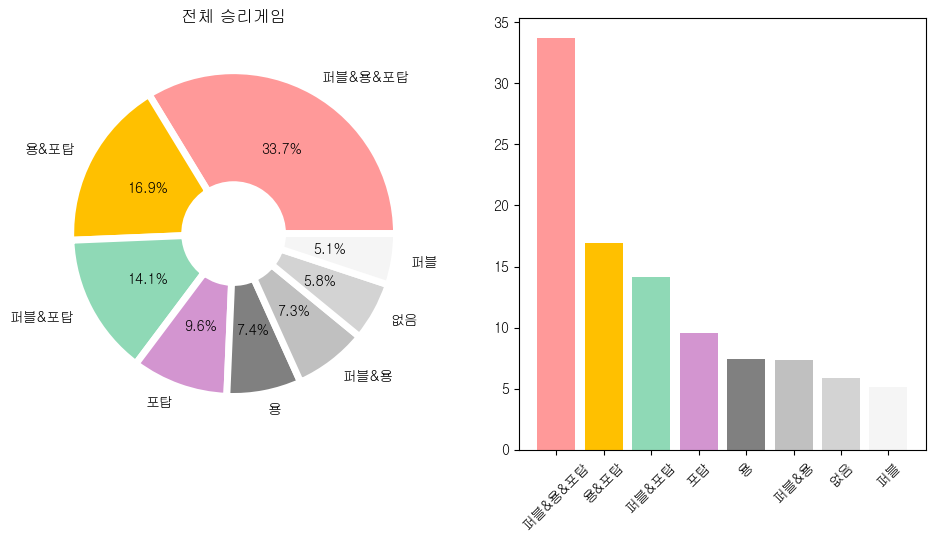

In [257]:
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1.5, top=1)

wedgeprops={'width': 0.7, 'edgecolor': 'w', 'linewidth': 5}
x = np.arange(len(tot_cnt2))
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gray', 'silver', 'lightgray', 'whitesmoke']

plt.subplot(1, 2, 1)

plt.pie(rate_lst, labels = lst, autopct='%1.1f%%',colors=colors, wedgeprops=wedgeprops)
plt.grid(True)
plt.title('전체 승리게임')

plt.subplot(1, 2, 2)
plt.bar(x, rate_lst,color=colors)
plt.xticks(x, lst, rotation=45)

plt.show()

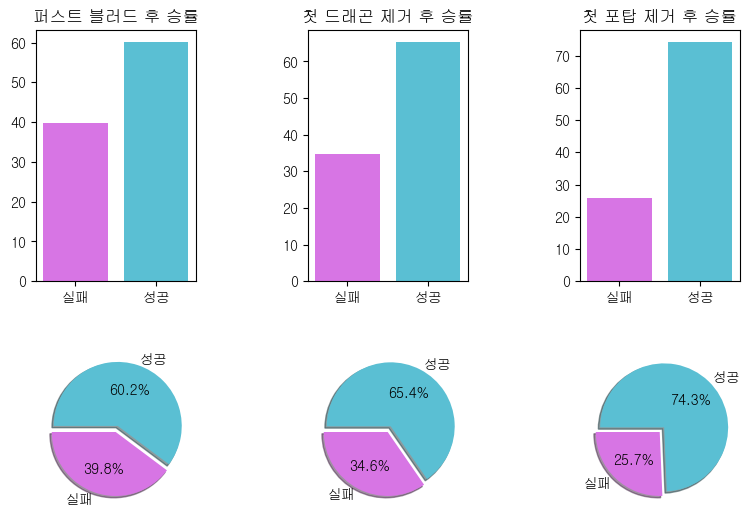

In [242]:
plt.subplots_adjust(left=0.1, bottom=0.1,  right=1.2, top=1.2, wspace=0.7, hspace=0.1)
color=['#D775E4','#5ABFD3']

plt.subplot(2, 3, 1)                # nrows=2, ncols=1, index=1
x = np.arange(2)
plt.title('퍼스트 블러드 후 승률')
plt.bar(x, fc_rate, color=color)
plt.xticks(x, fc_win)

plt.subplot(2, 3, 2)                # nrows=2, ncols=1, index=2
plt.title('첫 드래곤 제거 후 승률')
plt.bar(x, fd_rate, color=color)
plt.xticks(x, fd_win)

plt.subplot(2, 3, 3)                # nrows=2, ncols=1, index=2
plt.title('첫 포탑 제거 후 승률')
plt.bar(x, ft_rate, color=color)
plt.xticks(x, ft_win)

plt.subplot(2, 3, 4)                # nrows=2, ncols=1, index=1
x = np.arange(2)
plt.pie(fc_rate, labels=fc_win, autopct='%.1f%%',startangle=180, explode=[0,0.1],shadow=True,colors=color)

plt.subplot(2, 3, 5)                # nrows=2, ncols=1, index=2
plt.pie(fd_rate, labels=fd_win, autopct='%.1f%%',startangle=180, explode=[0,0.1],shadow=True,colors=color)

plt.subplot(2, 3, 6)                # nrows=2, ncols=1, index=2
plt.pie(ft_rate, labels=ft_win, autopct='%.1f%%',startangle=180, explode=[0,0.1],shadow=True,colors=color)

plt.show()